# Problem Description
Analyzing sentiments related to various products such as Tablet, Mobile and various other gizmos can be fun and difficult especially when collected across various demographics around the world. In this weekend hackathon, we challenge the machinehackers community to develop a machine learning model to accurately classify various products into 4 different classes of sentiments based on the raw text review provided by the user. Analyzing these sentiments will not only help us serve the customers better but can also reveal lot of customer traits present/hidden in the reviews.
The sentiment analysis requires a lot to be taken into account mainly due to the preprocessing involved to represent raw text and make them machine-understandable. Usually, we stem and lemmatize the raw information and then represent it using TF-IDF, Word Embeddings, etc. However, provided the state-of-the-art NLP models such as Transformer based BERT models one can skip the manual feature engineering like TF-IDF and Count Vectorizers.
In this short span of time, we would encourage you to leverage the ImageNet moment (Transfer Learning) in NLP using various pre-trained models.

# Dataset Description:
Train.csv - 6364 rows x 4 columns (Inlcudes Sentiment Columns as Target)
Test.csv - 2728 rows x 3 columns
Sample Submission.csv - Please check the Evaluation section for more details on how to generate a valid submission

# Attribute Description:
Text_ID - Unique Identifier
Product_Description - Description of the product review by a user
Product_Type - Different types of product (9 unique products)
Class - Represents various sentiments
0 - Cannot Say
1 - Negative
2 - Positive
3 - No Sentiment

# Skills Required:
NLP, Sentiment Analysis
Feature extraction from raw text using TF-IDF, CountVectorizer
Using Word Embedding to represent words as vectors
Using Pretrained models like Transformers, BERT
Optimizing multi-class log loss to generalize well on unseen data

# Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize

# Importing the Dataset


In [31]:
data=pd.read_csv("Train.csv")
data.head()


,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


WHAT IS INCLUDED IN EDA

Understanding the Dataset

Checking Missing Values

Data Types and Structure

Summary Statistics

Outlier Detection

Data Visualization (Histograms, Boxplots, Heatmaps, etc.)

# Exploratory Data Analysis (EDE)
Data shape is (6364, 4)
dtypes: int64(3), object(1)
id column has nothing to do with our model so it will be removed.
Most of the products belong to product type 9.
Most of the reviews in the datase are 2 means positive
Text data deals with words, not numbers — so traditional outlier detection (like boxplots) doesn't make sense.
Data has no missing values

In [32]:
data.shape

(6364, 4)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


In [34]:
# Checking missing values
data.isnull().sum()

Text_ID                0
Product_Description    0
Product_Type           0
Sentiment              0
dtype: int64

In [35]:
# Summary Statics
data["Product_Type"].mode()[0]
data["Sentiment"].mode()[0]

2

## Data Visualization
### Histogram
Shows the distribution (spread) of a single variable.

Helps to see where values are centered, whether data is skewed, or if there are peaks (modes).


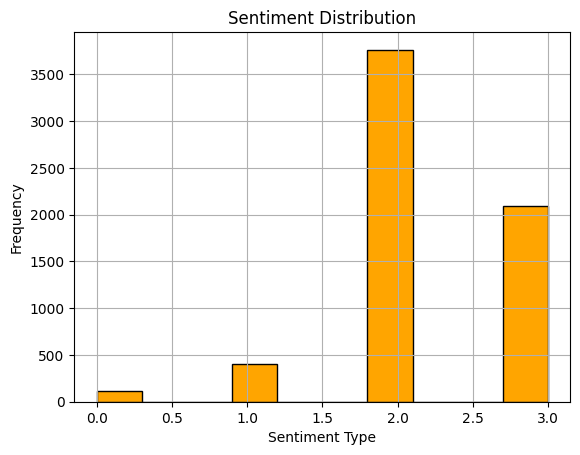

In [36]:
plt.hist(x=data["Sentiment"],color="orange",edgecolor="black",bins=10)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Frequency")
plt.grid(True)  # grid means the bars or boxes in backside
plt.show()

# Boxplot
Summarizes data based on 5 statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), maximum.

Detects outliers and shows data spread.

# Data Preprocessing
## Missing Values
No missing Values

In [37]:
data.isnull().sum()

Text_ID                0
Product_Description    0
Product_Type           0
Sentiment              0
dtype: int64

# Data Distribution


In [38]:
data.columns

Index(['Text_ID', 'Product_Description', 'Product_Type', 'Sentiment'], dtype='object')

In [39]:
# Removing unnecessary columns
data=data.drop(["Product_Type","Text_ID"],axis=1)

In [40]:
X=data["Product_Description"]
y=data["Sentiment"]

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# NLP
## Stemming


In [ ]:
import re
corpus=[]
ps=PorterStemmer()
for i in range(0,len(X)):
    review=re.sub("[^a-zA-Z]"," ",X[i])  # this will take all string that match given pattern of regular expressio
    review=review.lower()   # lowercase all words
    review=review.split()  # split paragraph in sentences and sentences in word
    # review=[print(word) for word in review] # take each word from each review
    review=[ps.stem(word) for word in review if word not in stopwords.words("english")] # will stem only those words which are not in stopwords
    review=" ".join(review)
    corpus.append(review)

corpus

['web designer\x89ûª guid io (and android) apps, today @mention 10 a.m! {link} #sxsw',
 'rt @mention line ipad 2 longer today yesterday. #sxsw // get line today fun?',
 'crazi appl open temporari store austin tomorrow handl rabid #sxsw eye pad seekers.',
 'lesson googl one pass: digit environment, user want purchas across everi platform one tool. #sxsw #elonsxsw',
 'rt @mention panel: &quot;your mom ipad, design boomers&quot; #sxsw',
 'rt @mention think ef hubbi line #ipad 2. someon point toward line-up wife number #2. #sxswi #sxsw',
 '&quot;android user iphon users. (they use option menu, contextu menu)&quot; ~@mention #sxsw',
 'wow! rt@mention interrupt regularli schedul #sxsw geek program big news {link} #googl #circl',
 'googl launch new social network call circles, possibl today {link} {link} #sxsw #in',
 '@mention welcome! enjoy #sxsw ride anywher austin $10 . dwnld #groundlink app{link} booth 437',
 'rt @mention appl plan keep austin wired, open pop-up appl store #sxsw {link}',


In [69]:
# Tokenization for model better performance 
from nltk.tokenize import word_tokenize

tokenized_corpus = []  # This will store tokenized versions

for each in corpus:
    tokens = word_tokenize(each)  # Split into words
    tokenized_corpus.append(tokens)

# Optional: To check
for tokens in tokenized_corpus[:5]:  # just showing first 5 examples
    print(tokens)
    print("\n")


['web', 'designer\x89ûª', 'guid', 'io', '(', 'and', 'android', ')', 'apps', ',', 'today', '@', 'mention', '10', 'a.m', '!', '{', 'link', '}', '#', 'sxsw']


['rt', '@', 'mention', 'line', 'ipad', '2', 'longer', 'today', 'yesterday', '.', '#', 'sxsw', '//', 'get', 'line', 'today', 'fun', '?']


['crazi', 'appl', 'open', 'temporari', 'store', 'austin', 'tomorrow', 'handl', 'rabid', '#', 'sxsw', 'eye', 'pad', 'seekers', '.']


['lesson', 'googl', 'one', 'pass', ':', 'digit', 'environment', ',', 'user', 'want', 'purchas', 'across', 'everi', 'platform', 'one', 'tool', '.', '#', 'sxsw', '#', 'elonsxsw']


['rt', '@', 'mention', 'panel', ':', '&', 'quot', ';', 'your', 'mom', 'ipad', ',', 'design', 'boomers', '&', 'quot', ';', '#', 'sxsw']




## One hot ecoding of text

In [72]:
# Suppose tokenized_corpus is already made using word_tokenize()

from tensorflow.keras.preprocessing.text import one_hot

voc_size = 5000

# JOIN each token list into a string and then one_hot to avoid error of " list has no attribute .lower()"
one_hot_repr = [one_hot(" ".join(tokens), voc_size) for tokens in tokenized_corpus]

print(one_hot_repr[0])


[1630, 4196, 480, 2254, 1847, 3605, 818, 264, 888, 4234, 1776, 17, 1941, 1087]


# Padding
Making all sentences of same size so that they can be provided as the input to model

In [73]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_sentence_length=20
same_sized_sentence=pad_sequences(one_hot_repr,padding="pre",maxlen=max_sentence_length)
same_sized_sentence

array([[   0,    0,    0, ...,   17, 1941, 1087],
       [   0,    0,    0, ..., 4344,  264, 3561],
       [   0,    0,    0, ..., 2398, 1776, 2685],
       ...,
       [   0,    0,    0, ..., 4680, 1941, 1087],
       [   0,    0,    0, ..., 2036,  854, 1087],
       [   0,    0,    0, ..., 1087, 4046, 1386]])

# Deep Learning + NLP
## Model Creation, adding Embedding layer and LSTM RNN

In [74]:
y.value_counts()

Sentiment
2    3765
3    2089
1     399
0     111
Name: count, dtype: int64

In [75]:
model=Sequential()
each_word_vectors=10
model.add(Embedding(input_dim=voc_size,output_dim=each_word_vectors,input_length=max_sentence_length))
model.add(LSTM(30))
model.add(Dense(4,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"],optimizer="adam")

e:\vs code software\python\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [76]:
model.build((None,20))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 20, 10)         │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30)             │         4,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,044 (215.02 KB)

 Trainable params: 55,044 (215.02 KB)

 Non-trainable params: 0 (0.00 B)

## Balancing the Data due to being unbalanced model considers everything positive
This is the best way in Deep learning to tell model where to focus more


In [ ]:
#Class weights help the model to pay more attention to the underrepresented classes (minority classes) 
# and less attention to the overrepresented classes (majority classes).
from sklearn.utils import class_weight
class_weights=class_weight.compute_class_weight(class_weight="balanced",
            classes=np.unique(y),
            y=y
            )
class_weights=dict(enumerate(class_weights))

## Model Training

In [86]:
X_final=np.array(same_sized_sentence)
y_final=np.array(y)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,train_size=0.8, random_state=42)

In [ ]:
# Oversampling the minority class increases the number of examples from the minority class.
# I apply this technique b/c most of the setiment in my dataset is positive and that's model predict positive even for negative sentiments.
# It will increase the number of negative sentiments in the dataset.
from imblearn.over_sampling import SMOTE

# Apply SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='auto')  # 'auto' means balance all classes
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [101]:
model.fit(X_train,y_train, epochs=10,batch_size=50,class_weight=class_weights)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9030 - loss: 0.1997
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9047 - loss: 0.2187
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9107 - loss: 0.2263
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9152 - loss: 0.1879
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9161 - loss: 0.1713
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9130 - loss: 0.1597
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9237 - loss: 0.1477
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9153 - loss: 0.1725
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9186 - loss: 0.1452
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9215 - loss: 0.1502


## Getting Predictions and Accuracy score
Note: When you use softmax function , it results in probabilites not direct class numbers.

You have to convert probabilities to class labels before calculating accuracy or any metric.

In [102]:
y_pred=model.predict(X_test)
y_pred  # it contains the probability of each class

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[5.0013146e-05, 3.5006626e-04, 9.9910235e-01, 4.9761304e-04],
       [5.9053907e-04, 7.4746707e-03, 9.8413152e-01, 7.8032422e-03],
       [3.5274857e-01, 1.2294807e-03, 1.6594777e-04, 6.4585602e-01],
       ...,
       [5.4682579e-02, 5.3319694e-03, 8.0928523e-03, 9.3189257e-01],
       [3.3622724e-05, 2.9501625e-04, 9.9958223e-01, 8.9189089e-05],
       [3.9037285e-04, 7.1196357e-04, 1.4192882e-01, 8.5696888e-01]],
      dtype=float32)

In [103]:
# Converting the probability to class labels and then find the accuracy score
y_pred=np.argmax(y_pred,axis=1)
y_pred


array([2, 2, 3, ..., 3, 2, 3], dtype=int64)

In [104]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6087981146897093

# Saving the model

In [105]:
model.save("sentiment_model.keras")

ERROR NOTE: if you get any error in traing then try to recheck the lines of codes in which you make model and then add layers to it
